## Jose Antonio Ortega Bonilla - 2019342374
## Kevin Alejandro Porras Alpizar - 2019204781
### TS16 - Física Computacional I

In [2]:
#Importamos las librerías a usar
import numpy as np
import random
import matplotlib.pyplot as plt

In [132]:
#Parametros iniciales
nGenes = 100
tamanoPoblacion = 100

## Algoritmo Genetico Estandar

In [123]:
def mezclar_lista(lista_original):
    # Crear una copia, ya que no deberíamos modificar la original
    lista = np.copy(lista_original)
    # Ciclo for desde 0 hasta la longitud de la lista -1
    longitud_lista = len(lista)
    for i in range(longitud_lista):
        # Obtener un índice aleatorio
        indice_aleatorio = random.randint(0, longitud_lista - 1)
        # Intercambiar
        temporal = lista[i]
        lista[i] = lista[indice_aleatorio]
        lista[indice_aleatorio] = temporal
    # Regresarla
    return lista

In [124]:
def InicializarPoblacion(tamanoPoblacion, nGenes):
    '''
    Función encargada de generar población de cromosomas, en los cuales sus genes se distribuyen de manera aleatoria
    '''    
    poblacion = []
    # Ciclo encargado de generar un cromosoma y añadirlo a la población.
    for i in range(tamanoPoblacion):
        cromosoma = np.arange(0,nGenes,1)
        cromosoma = mezclar_lista(cromosoma)
        poblacion.append(cromosoma)
        
    # Se retorna el array de la población final obtenida
    return np.array(poblacion)

In [125]:
def OperadorMutación(cromosoma, p_mut):
    cromosomaMutado = np.copy(cromosoma)
    A = np.random.random() #Variable que determinará si se hace o no la mutación
    if A < p_mut: #Si A es menor que la probabilidad, entonces sí se hace la mutación
        pos1 = random.randint(0, len(cromosoma) - 1)
        pos2 = random.randint(0, len(cromosoma) - 1)
        while pos1 == pos2:
            pos2 = random.randint(0, len(cromosoma) - 1)
        # Se genera el intercambio de posición
        cromosomaMutado[pos1] = cromosoma[pos2]
        cromosomaMutado[pos2] = cromosoma[pos1]
    return cromosomaMutado

In [126]:
def Coordenadas(nGenes):
    '''
    Función encargada de determinar las coordenadas de cada ciudad
    '''
    pares_ordenados = np.zeros(shape=(nGenes,2))
    for i in range(nGenes):
        pares_ordenados[i][0] = 0.1*((9+13*(i+1)**2)%200) # Determinación de la posición en el eje x de la ciudad escogida
        pares_ordenados[i][1] = 0.1*((7+1327*(i+1))%200) # Determinación de la posición en el eje y de la ciudad escogida
     # Se retorna los pares ordenados
    return pares_ordenados

In [127]:
def FunciondeAjuste(cromosoma):
    '''
    Función encargada de determinar la distancia que hay de ciudad en ciudad y sumar su totalidad
    '''
    pares_ordenados = Coordenadas(np.max(cromosoma)+1)
    distancia = 0 #Variable que medirá la distancia total final recorrida
    for i in range(len(cromosoma)):
        if i == (len(cromosoma)-1): # Condición que se encarga en detectar si se llega hasta la última ciudad y medir su distancia con respecto a la primera ciudad del cromosoma
            distancia += ((pares_ordenados[cromosoma[i]][0]-pares_ordenados[cromosoma[0]][0])**2+(pares_ordenados[cromosoma[i]][1]-pares_ordenados[cromosoma[0]][1])**2)**(0.5)
        else: # Si no se cumple lo anterior, solo mide la distancia que hay entre un ciudad y otra
            distancia += ((pares_ordenados[cromosoma[i]][0]-pares_ordenados[cromosoma[i+1]][0])**2+(pares_ordenados[cromosoma[i]][1]-pares_ordenados[cromosoma[i+1]][1])**2)**(0.5)
    # Retorna el inverso de la distancia
    return 1/distancia

In [152]:
def Ejecutando(tamanoPoblacion, nGenes):
    poblacion = InicializarPoblacion(tamanoPoblacion, nGenes) # Población de cromosomas
    p_mut = 1/nGenes # Probabilidad de mutación
    valoresAjuste = np.zeros(shape=tamanoPoblacion) # Variable que almacenará el inverso de la distancia final recorrida de cada cromosoma
    for i in range(tamanoPoblacion): # Ciclo encargado de mutar el cromosoma y determinar la distancia
        cromosomaMutado = OperadorMutación(poblacion[i], p_mut)
        poblacion[i] = cromosomaMutado
        valoresAjuste[i] = FunciondeAjuste(poblacion[i])
    valor = np.max(valoresAjuste) # Se obtiene el máximo valor del inverso de la distancia
    distancia= valor**(-1)  # Se obtiene la distancia
    individuo_seleccionado = np.where(valoresAjuste == valor) # Se obtiene la posición del cromosoma con la menor distancia en la población
    
    # Se retorna el cromosoma escogido y la distancia
    return  poblacion[individuo_seleccionado[0]] , valor, distancia, np.mean(valoresAjuste)
cromosoma_escogido, valor, distancia, ajuste_Promedio = Ejecutando(tamanoPoblacion, nGenes)

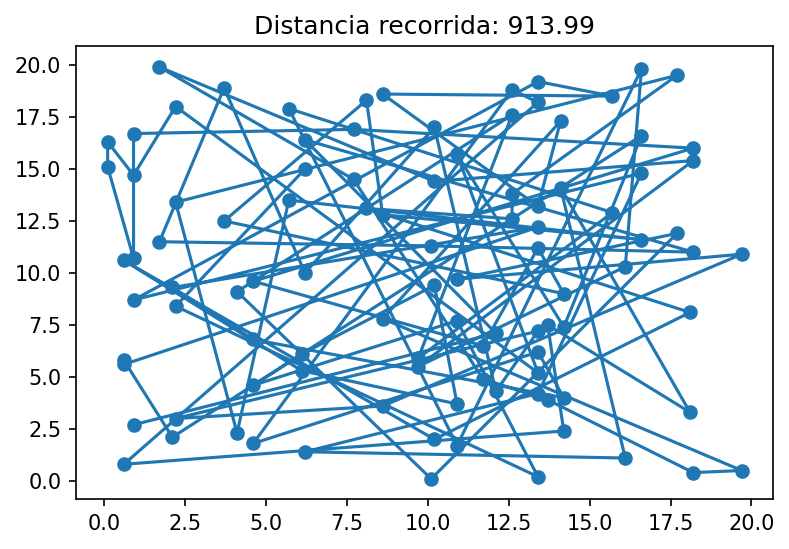

In [153]:
def Graficando(cromosoma,nGenes,distancia):
    '''
    Función encargada de graficar el recorrido realizado en el cromosoma escogido
    '''
    coordenadas = Coordenadas(nGenes)
    pares_ordenados = np.zeros(shape=(nGenes,2))
    contador = 0
    for i in cromosoma:
        pares_ordenados[contador][0]=coordenadas[int(i)][0]
        pares_ordenados[contador][1]=coordenadas[int(i)][1]
        contador += 1
    fig, ax = plt.subplots(1, 1, dpi=150)
    ax.scatter(pares_ordenados[:,0],pares_ordenados[:,1])
    ax.plot(pares_ordenados[:,0],pares_ordenados[:,1])
    plt.title("Distancia recorrida: "+str(round(distancia,2)))
    return
Graficando(cromosoma_escogido[0],nGenes,distancia)

In [154]:
print("El valor de ajuste del individuo mejor adaptado es: "+str(valor)+" mientras que el valor promedio de la poblacion fue de: "+str(ajuste_Promedio))

El valor de ajuste del individuo mejor adaptado es: 0.0010941095575906661 mientras que el valor promedio de la poblacion fue de: 0.0009612232363499135


## Algoritmo Genetico Modificado

In [140]:
#Se realiza una funcion para crear cada cromosoma
def CromosomaModificado(nGenes,ciudad_inicial):
    #Inicializamos el array del cromosoma
    cromosoma = np.arange(0,nGenes,1)
    cromosoma = cromosoma + nGenes + 1
    cromosoma[0] = ciudad_inicial
    pares_ordenados = Coordenadas(nGenes)
    for i in range(1,nGenes):
        #Definimos una especie de salvador para las distancias minimas que se vayan obteniendo
        distancia = 1000000000
        c = int(cromosoma[i-1])
        for j in range(nGenes):
            #Se determina la distancia entre dos ciudades
            distancia1 = ((pares_ordenados[c][0]-pares_ordenados[j][0])**2+(pares_ordenados[c][1]-pares_ordenados[j][1])**2)**(0.5)
            #Si la ciudad con la que se esta calculando la distancia ya esta en la ruta, entonces no sucede nada
            if j in cromosoma:
                distancia=distancia
            #Se verifica que la distancia entre las dos ciudades sea menor a la distancia minima obtenidad anteriormente
            #ademas se verifica que no sean la misma ciudad
            elif distancia1 <= distancia and cromosoma[i-1]!=j:
                    distancia = distancia1
                    cromosoma[i] = int(j) 
    return np.array(cromosoma)

In [141]:
def InicializarPoblacionModificado(tamanoPoblacion, nGenes):
    '''
    Función encargada de generar población de cromosomas, en los cuales sus genes se distribuyen de manera aleatoria
    '''
    poblacion = []
    ciudades = []
     # Ciclo encargado de generar un cromosoma y añadirlo a la población.
    for i in range(tamanoPoblacion):
    for i in range(tamanoPoblacion):
        ciudad_inicial = int(random.randint(0, nGenes-1))
        #Si la ciudad_inicial ya se habia utilizado antes, no sucede nada
        if ciudad_inicial in ciudades:
            ciudades=ciudades
        else:
            cromosoma = CromosomaModificado(nGenes,ciudad_inicial)
        poblacion.append(cromosoma)
        
    return np.array(poblacion)

In [146]:
def EjecutandoModificado(tamanoPoblacion, nGenes):
    '''
    Función encargada de llamar las funciones y buscar el cromosoma con la menor distancia
    '''
    poblacion = InicializarPoblacionModificado(tamanoPoblacion, nGenes) # Población de cromosomas
    p_mut = 1/nGenes # Probabilidad de mutación
    valoresAjuste = np.zeros(shape=tamanoPoblacion) # Variable que almacenará el inverso de la distancia final recorrida de cada cromosoma
    for i in range(1,tamanoPoblacion): # Ciclo encargado de mutar el cromosoma y determinar la distancia
        cromosomaMutado = OperadorMutación(poblacion[i], p_mut)
        cromosomaMutado = OperadorMutación(poblacion[i], p_mut)
        cromosomaMutado = OperadorMutación(poblacion[i], p_mut)
        poblacion[i] = cromosomaMutado
        valoresAjuste[i] = FunciondeAjuste(poblacion[i])
    valor = np.max(valoresAjuste) # Se obtiene el máximo valor del inverso de la distancia
    distancia= valor**(-1) # Se obtiene la distancia
    individuo_seleccionado = np.where(valoresAjuste == valor) # Se obtiene la posición del cromosoma con la menor distancia en la población
    
    # Se retorna el cromosoma escogido y la distancia
    return  poblacion[individuo_seleccionado[0]] , valor, distancia, np.mean(valoresAjuste)
cromosoma_escogido_modi, valor_modi, distancia_modi, ajuste_Promedio_Modi = EjecutandoModificado(tamanoPoblacion, nGenes)

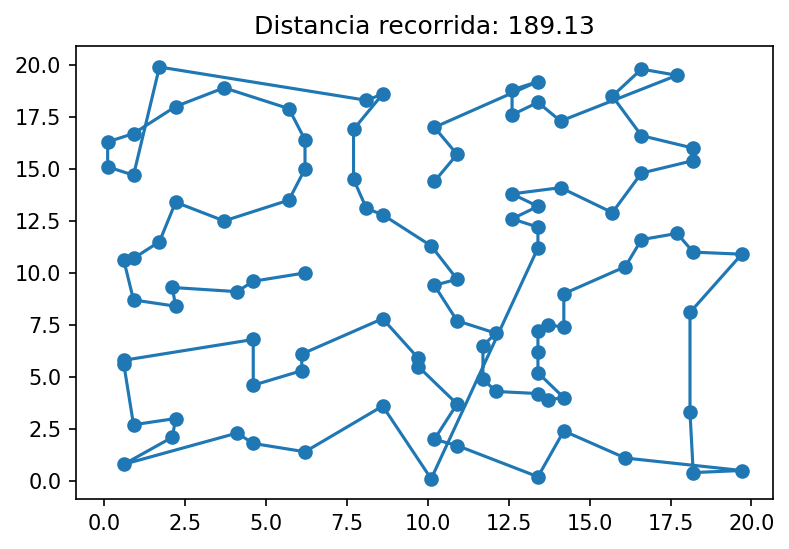

In [147]:
Graficando(cromosoma_escogido_modi[0],nGenes,distancia_modi)

In [149]:
print("El valor de ajuste del individuo mejor adaptado es: "+str(valor_modi)+" mientras que el valor promedio de la poblacion fue de: "+str(ajuste_Promedio_Modi))

El valor de ajuste del individuo mejor adaptado es: 0.005287268233935395 mientras que el valor promedio de la poblacion fue de: 0.004719546853194087
